## Step 1: Initialize OpenAI Client and Test API

In this step, we set up the OpenAI client and verify that the API key works by making a simple test request.

### What happens in this step:

1. **Load environment variables**  
   We use the `dotenv` package to load the `.env` file and retrieve the `OPENAI_API_KEY`.

2. **Check API key availability**  
   A quick check confirms that the key is successfully loaded and not `None`.

3. **Initialize OpenAI client**  
   We create an instance of the `OpenAI` client, which will be used for all subsequent API calls.

4. **Test a simple request**  
   We call the `responses.create()` method with a minimal prompt (`"Hello! Respond with one short sentence."`) to verify connectivity and functionality.

5. **Print the output**  
   The API response is printed to confirm that the client is working correctly.

### Outcome:
- OpenAI API key is loaded successfully
- Client is initialized
- Test request returns a valid response


In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()
print(os.getenv("OPENAI_API_KEY"))
print(os.getenv("OPENAI_API_KEY") is not None)

In [2]:
from openai import OpenAI 
client = OpenAI() 
response = client.responses.create( model="gpt-4.1-mini", input="Hello! Respond with one short sentence." ) 
print(response.output_text)

Hello! How can I help you today?


## Step 2: Preparing the Dataset

In this step, we load the e-commerce product dataset:

1. **Try HuggingFace dataset**: We load the first 100 samples for testing.
2. **Fallback local dataset**: In case HuggingFace is unavailable, we use local JSON data.
3. **DataFrame conversion**: Easier manipulation using `pandas`.
4. **Images folder setup**: Creates a directory to store product images if needed.

After running this step, `products_df` contains product metadata and paths to images.


In [1]:
# Step 2: Load and prepare the product dataset
# This block loads the dataset from HuggingFace (or fallback local dataset),
# converts it to a pandas DataFrame, and sets up the images folder.

from datasets import load_dataset
import pandas as pd
from pathlib import Path

print("Loading product dataset...")
try:
    # Load first 100 samples from HuggingFace dataset
    dataset = load_dataset("ashraq/fashion-product-images-small", split="train[:100]")
    print(f"✓ Loaded {len(dataset)} products")
    
    # Convert to pandas DataFrame
    products_df = pd.DataFrame(dataset)
    print(f"Dataset columns: {products_df.columns.tolist()}")
    
except Exception as e:
    print(f"⚠ Could not load HuggingFace dataset: {e}")
    print("Using local images instead...")
    
    # Fallback local dataset
    products_data = [
        {
            "id": 1,
            "name": "Wireless Headphones",
            "price": 79.99,
            "category": "Electronics",
            "image_path": "images/product1.jpg"
        },
        # Add more products if needed
    ]
    
    products_df = pd.DataFrame(products_data)

# Create images directory
images_dir = Path("product_images")
images_dir.mkdir(exist_ok=True)

print(f"\n✓ Dataset prepared!")
print(f"Total products: {len(products_df)}")


c:\Users\marco\miniconda3\envs\ironhack-labs-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading product dataset...


c:\Users\marco\miniconda3\envs\ironhack-labs-env\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marco\.cache\huggingface\hub\datasets--ashraq--fashion-product-images-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 44072/44072 [00:04<00:00, 9050.94 example

✓ Loaded 100 products
Dataset columns: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image']

✓ Dataset prepared!
Total products: 100


First 5 products:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,<PIL.Image.Image image mode=L size=60x80 at 0x...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,<PIL.Image.Image image mode=RGB size=60x80 at ...



Displaying first 5 product images:
1. Turtle Check Men Navy Blue Shirt


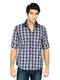

2. Peter England Men Party Blue Jeans


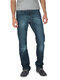

3. Titan Women Silver Watch


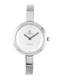

4. Manchester United Men Solid Black Track Pants


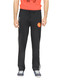

5. Puma Men Grey T-shirt


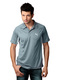

In [4]:
# Step 2 Verification: Display first 5 products and their images

from PIL import Image
from IPython.display import display

# Show first 5 products in DataFrame
print("First 5 products:")
display(products_df.head())

# Display images for first 5 products (if 'image' column exists)
if 'image' in products_df.columns:
    print("\nDisplaying first 5 product images:")
    for i in range(min(5, len(products_df))):
        try:
            img = products_df.loc[i, 'image']  # Already a PIL image
            print(f"{i+1}. {products_df.loc[i, 'productDisplayName']}")
            display(img)
        except Exception as e:
            print(f"⚠ Could not display image {i+1}: {e}")


## Step 3: Encoding Images for API

We need to convert product images to **base64 format** so they can be sent over HTTP to the ChatGPT API.

1. Define a function `encode_image_to_base64(img)` that:
    - Saves a `PIL.Image` object to a memory buffer as JPEG
    - Converts the buffer to a bytes object
    - Encodes the bytes to a base64 string
2. Test the function by encoding the first product image
3. Print the length of the base64 string to verify encoding


✓ All product images encoded to base64.

Verifying first 5 images:
1. Base64 length: 2388 characters


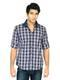

2. Base64 length: 2292 characters


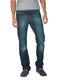

3. Base64 length: 1140 characters


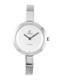

4. Base64 length: 1984 characters


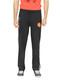

5. Base64 length: 2368 characters


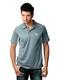

In [7]:
# Step 3: Encode all product images to base64 and verify

import base64
from io import BytesIO
from IPython.display import display

# Function to encode PIL.Image to base64
def encode_image_to_base64(img):
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_bytes = buffered.getvalue()
    img_b64 = base64.b64encode(img_bytes).decode('utf-8')
    return img_b64

# Add a new column to products_df with base64 images
products_df['image_b64'] = products_df['image'].apply(encode_image_to_base64)

print("✓ All product images encoded to base64.")

# Checkpoint: verify first 5 encoded images
print("\nVerifying first 5 images:")
for i in range(min(5, len(products_df))):
    img_b64 = products_df.loc[i, 'image_b64']
    print(f"{i+1}. Base64 length: {len(img_b64)} characters")
    
    # Decode and display image
    img_bytes = base64.b64decode(img_b64)
    img_reconstructed = Image.open(BytesIO(img_bytes))
    display(img_reconstructed)


## Step 4: Creating the Product Listing Prompt

In this step, we define a prompt template for generating professional product listings using ChatGPT. We use the **Ironhack-provided function** `create_product_listing_prompt()` exactly as given.

### What this code does:

1. Defines the function `create_product_listing_prompt()` which takes:
   - `product_name`: Name of the product
   - `price`: Price of the product
   - `category`: Product category
   - `additional_info` (optional): Extra details like color, season, or features

2. Generates a detailed prompt that instructs ChatGPT to:
   - Analyze the product image
   - Create a professional listing including:
     - **Title** (catchy, SEO-friendly)
     - **Description** (150-200 words, detailed and persuasive)
     - **Key Features** (bullet points)
     - **SEO Keywords** (comma-separated)

3. The output is structured in **JSON format**, ready for programmatic use.

4. The code also includes a **test call** to the function with a sample product to verify that the prompt is generated correctly.

### Example:

```python
# Test prompt creation
test_prompt = create_product_listing_prompt(
    product_name="Wireless Bluetooth Headphones",
    price=79.99,
    category="Electronics",
    additional_info="Noise cancelling, 30-hour battery"
)

# Show first 500 characters of the generated prompt
print("\n" + "="*50)
print("PROMPT TEMPLATE")
print("="*50)
print(test_prompt[:500] + "...")


In [ ]:
# Step 4: Create product listing prompts using Ironhack template


def create_product_listing_prompt(product_name, price, category, additional_info=None):
    """
    Create a prompt for generating product listings.
    
    Parameters:
    - product_name: Name of the product
    - price: Price of the product
    - category: Product category
    - additional_info: Optional additional information
    
    Returns:
    - Formatted prompt string
    """
    prompt = f"""You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: {product_name}
- Price: ${price:.2f}
- Category: {category}
{f'- Additional Info: {additional_info}' if additional_info else ''}

Please create a professional product listing that includes:

1. **Product Title** (catchy, SEO-friendly, 60 characters max)
2. **Product Description** (detailed, 150-200 words)
   - Highlight key features and benefits
   - Use persuasive language
   - Include relevant details visible in the image
3. **Key Features** (bullet points, 5-7 items)
4. **SEO Keywords** (comma-separated, 10-15 relevant keywords)

Format your response as JSON with the following structure:
{{
    "title": "Product title here",
    "description": "Full description here",
    "features": ["Feature 1", "Feature 2", ...],
    "keywords": "keyword1, keyword2, ..."
}}

Be specific about what you see in the image. Mention colors, materials, design elements, and any distinctive features."""
    
    return prompt

# Test prompt creation
test_prompt = create_product_listing_prompt(
    product_name="Wireless Bluetooth Headphones",
    price=79.99,
    category="Electronics",
    additional_info="Noise cancelling, 30-hour battery"
)

print("\n" + "="*50)
print("PROMPT TEMPLATE")
print("="*50)
print(test_prompt[:1500] + "...")  # Show first 1500 characters



PROMPT TEMPLATE
You are an expert e-commerce copywriter. Analyze the product image and create a compelling product listing.

Product Information:
- Name: Wireless Bluetooth Headphones
- Price: $79.99
- Category: Electronics
- Additional Info: Noise cancelling, 30-hour battery

Please create a professional product listing that includes:

1. **Product Title** (catchy, SEO-friendly, 60 characters max)
2. **Product Description** (detailed, 150-200 words)
   - Highlight key features and benefits
   - Use persuasive language
   - Include relevant details visible in the image
3. **Key Features** (bullet points, 5-7 items)
4. **SEO Keywords** (comma-separated, 10-15 relevant keywords)

Format your response as JSON with the following structure:
{
    "title": "Product title here",
    "description": "Full description here",
    "features": ["Feature 1", "Feature 2", ...],
    "keywords": "keyword1, keyword2, ..."
}

Be specific about what you see in the image. Mention colors, materials, design

## Step 4a: Preview Product Images

Before sending images to the ChatGPT API, we want to **preview them** to decide which products to generate listings for.

**What this step does:**

1. Loops through the first **N** products in our dataset.
2. Displays each product's image using PIL.
3. Prints key metadata (name, category, color, season) for context.
4. Pauses after each image, so you can review and choose which products to use for Step 5b (API call).

**Why:**  
- This allows you to **select images manually** without downloading all images to your PC.  
- Ensures you send the correct product image to the API for listing generation.


In [ ]:
from PIL import Image
import requests
from io import BytesIO

# Preview the first N products (set to 5)
num_preview = min(5, len(products_df))

for i in range(num_preview):
    product = products_df.iloc[i]
    
    # Show product info
    print(f"\n--- Product {i+1} ---")
    print(f"Name: {product['productDisplayName']}")
    print(f"Category: {product['masterCategory']} > {product['subCategory']} > {product['articleType']}")
    print(f"Color: {product['baseColour']}, Season: {product['season']}")
    
    # Display the image (already a PIL Image object)
    img = product['image']  # no indexing needed
    img.show()
    
    # Wait for user to close image before moving to next
    input("Press Enter to continue to next product...")


# Step 5: Calling the ChatGPT API with Vision

**Objective:** Send a product image and text prompt to the ChatGPT API and receive a structured product listing.

**What is happening in this step:**

1. **Use the prepared prompt:**  
   We use the prompt created in Step 4, which contains product name, price, category, and optional additional information.

2. **Use the encoded image:**  
   The product image has already been converted to **base64 format** in Step 3.

3. **Prepare the API request:**  
   We send the model (`gpt-4.1-mini`) a combination of:
   - The text prompt
   - The base64-encoded image

4. **Send the request:**  
   The API processes the prompt and image, generating a structured JSON response.

5. **Handle the response:**  
   We check for any errors and ensure the output is valid.

6. **Parse the JSON output:**  
   The response is parsed to extract:
   - `title` → SEO-friendly product title  
   - `description` → detailed product description  
   - `features` → list of key features  
   - `keywords` → SEO keywords

**Checkpoint:** Verify that the API call succeeds, JSON is well-formed, and all fields are returned correctly.


In [23]:
# Step 5: Call ChatGPT API with vision for one product (using prepared prompt and encoded image)

from openai import OpenAI
import json

# Initialize the OpenAI client (if not already initialized)
client = OpenAI()

# Select the first product
first_product = products_df.iloc[0]

# Create the prompt using the Ironhack function
product_prompt = create_product_listing_prompt(
    product_name=first_product['productDisplayName'],
    price=first_product.get('price', 0.0),
    category=f"{first_product['masterCategory']} > {first_product['subCategory']} > {first_product['articleType']}",
    additional_info=f"Color: {first_product['baseColour']}, Season: {first_product['season']}"
)

# Retrieve the base64-encoded image from Step 3
img_b64 = first_product['image_b64']

# Prepare API input using the vision-supported format
api_input = [
    {
        "role": "user",
        "content": [
            {"type": "input_text", "text": product_prompt},
            {"type": "input_image", "image_url": f"data:image/jpeg;base64,{img_b64}"}
        ]
    }
]

# Call the API
try:
    response = client.responses.create(
        model="gpt-4.1-mini",
        input=api_input
    )
    
    # Extract JSON output
    output_text = response.output_text
    product_listing = json.loads(output_text)
    
    print("✓ Product listing generated successfully!\n")
    print(json.dumps(product_listing, indent=4))

except Exception as e:
    print(f"⚠ Error calling ChatGPT API: {e}")


✓ Product listing generated successfully!

{
    "title": "Turtle Check Men Navy Blue Shirt - Stylish Fall Wear",
    "description": "Elevate your casual wardrobe with the Turtle Check Men Navy Blue Shirt, designed to offer both comfort and style for the fall season. This shirt showcases an eye-catching checkered pattern in navy blue and white, providing a versatile look perfect for both office and weekend outings. Crafted from lightweight, breathable fabric, it ensures all-day comfort no matter the occasion. Featuring a classic collar, full button-down front, and long sleeves with buttoned cuffs, this shirt combines timeless design with modern fit. The slim silhouette enhances your shape without compromising ease of movement. Pair it effortlessly with jeans or chinos for a polished yet relaxed appearance. Whether layered under a jacket or worn alone, this check shirt is a must-have addition to your fall wardrobe.",
    "features": [
        "Classic navy blue and white checkered patte

In [19]:
# Store product description into a JSON file
output_filename = "ProductDescription1.json"

# Save the generated product listing
with open(output_filename, "w", encoding="utf-8") as f:
    json.dump(product_listing, f, indent=4, ensure_ascii=False)

print(f"✓ Product listing saved to {output_filename}")


✓ Product listing saved to ProductDescription1.json


## Step 6: Processing Multiple Products

In this step, we generate product listings for multiple products (products 2, 3, and 4) in batch using the ChatGPT Vision API.

### What happens in this step:

1. **Loop through multiple products**  
   We select products with indices 1, 2, and 3 from the dataset, corresponding to product listings 2, 3, and 4.

2. **Create a prompt for each product**  
   For every product, we reuse the `create_product_listing_prompt()` function created in Step 4, injecting:
   - Product name
   - Price
   - Category hierarchy
   - Additional visible attributes (color and season)

3. **Attach the product image**  
   The base64-encoded image generated in Step 3 is retrieved from the `image_b64` column and sent together with the prompt.

4. **Call the ChatGPT API with vision**  
   We send both text and image to the `gpt-4.1-mini` model and receive a structured JSON response.

5. **Parse and save results**  
   Each response is:
   - Parsed from JSON
   - Saved as an individual file (`ProductDescription2.json`, `ProductDescription3.json`, `ProductDescription4.json`)

6. **Display a human-readable preview**  
   In addition to saving JSON, we print:
   - Product title
   - Description
   - Key features
   - SEO keywords  
   This makes it easy to visually inspect the generated listings inside the notebook.

7. **Graceful error handling**  
   If one product fails, the loop continues and processes the remaining products without stopping the execution.

### Outcome:
- Multiple product listings generated automatically
- Results stored in structured JSON files
- Clean, readable output displayed in the notebook


In [24]:
# Step 6: Call ChatGPT API with vision for products 2, 3, and 4

# Loop over products 2, 3, 4 (indices 1, 2, 3)
for i in [1, 2, 3]:
    try:
        product = products_df.iloc[i]

        # Create the prompt using the Ironhack function
        product_prompt = create_product_listing_prompt(
            product_name=product['productDisplayName'],
            price=product.get('price', 0.0),
            category=f"{product['masterCategory']} > {product['subCategory']} > {product['articleType']}",
            additional_info=f"Color: {product['baseColour']}, Season: {product['season']}"
        )

        # Retrieve the base64-encoded image from Step 3
        img_b64 = product['image_b64']

        # Prepare API input using vision-supported format
        api_input = [
            {
                "role": "user",
                "content": [
                    {"type": "input_text", "text": product_prompt},
                    {"type": "input_image", "image_url": f"data:image/jpeg;base64,{img_b64}"}
                ]
            }
        ]

        # Call the API
        response = client.responses.create(
            model="gpt-4.1-mini",
            input=api_input
        )

        # Extract JSON output
        output_text = response.output_text
        product_listing = json.loads(output_text)

        # Save JSON file
        filename = f"ProductDescription{i+1}.json"
        with open(filename, "w", encoding="utf-8") as f:
            json.dump(product_listing, f, indent=4, ensure_ascii=False)

        # Print in human-readable format
        print(f"\n=== Product {i+1} Listing ===")
        print("TITLE:")
        print(product_listing["title"])
        print("\nDESCRIPTION:")
        print(product_listing["description"])
        print("\nFEATURES:")
        for ftr in product_listing["features"]:
            print(f"- {ftr}")
        print("\nKEYWORDS:")
        print(product_listing["keywords"])
        print(f"\n✓ Saved to {filename}")

    except Exception as e:
        print(f"⚠ Error processing product {i+1}: {e}")

print("\n✓ Step 6 completed: Multiple products processed.")



=== Product 2 Listing ===
TITLE:
Peter England Men Party Blue Jeans - Stylish Summer Wear

DESCRIPTION:
Step out in style with the Peter England Men Party Blue Jeans, designed to elevate your summer wardrobe. Crafted from high-quality denim, these jeans offer a perfect blend of comfort and durability. The rich blue hue adds a classic yet trendy touch, making them ideal for casual and party occasions. Featuring a slim fit design, they contour to your legs for a sharp and modern look. The jeans include classic five-pocket styling and detailed stitching that enhances their visual appeal. Lightweight and breathable, they are perfect for warmer weather, providing unrestricted movement without compromising on style. Whether paired with a casual shirt or a trendy tee, these jeans guarantee a sleek and confident appearance. Upgrade your bottomwear collection with these versatile Peter England jeans designed to keep you comfortable and stylish all summer long.

FEATURES:
- Premium quality blue